Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">Markus</p>| <p style="text-align: left">Frohmann</p> | k12005604 |
| <p style="text-align: left">Tobias</p>| <p style="text-align: left">Morocutti</p> | k12008172 |



<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2022/23)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 2</h1>
<h2 style="color:rgb(0,120,170)">Getting to Know Word Embedding!</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University Linz (JKU), and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-taskA"><li style="font-size:large;font-weight:bold">Task A: Words Similarity and Nearest Neighbors (15 points)</li></a>
    <a href="#section-taskB"><li style="font-size:large;font-weight:bold">Task B: Document Classification with Word Embedding (15 points)</li></a>
    <a href="#section-taskC"><li style="font-size:large;font-weight:bold">Task C: Classification with sent2vec Document Embeddings (2 extra point)</li></a>
    <a href="#section-references"><li style="font-size:large;font-weight:bold">References</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective
The aim of this assignment is to get familiarized with using word embedding (WE) models in practice. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f083887a0401841aee8fab3d36/44093/-2905493136371866025/nlp2022_23_data.zip).

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.label.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-taskA"></a><h2 style="color:rgb(0,120,170)">Task A: Words Similarity and Nearest Neighbors (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

**Loading a word embedding (WE) model (1 points).** Download a pre-trained word embedding model such as word2vec (https://code.google.com/archive/p/word2vec/) or GloVe (https://nlp.stanford.edu/projects/glove/). You can load the downloaded vectors into arrays, or use libraries such as `gensim` to download and process the vectors. 

**Calculating word-to-word similarities (4 points).** Select <ins>5 arbitrary words</ins> from 5 different topics like objects, science disciplines, verbs, adjectives, animals, etc. Let us refer to these words as *source words*. For each source word, calculate its cosine similarities to <ins>6 target words</ins>. The target words of each source word are also selected by you and should cover various levels of semantic relations – according to your linguistic judgement – to the source word, namely from highly-related to not related at all. Organize the target words in tables, such that the target words of each source word are sorted from the highest to the lowest relevance (according to your judgement). Consider the following points:

- **Implementation (2/4 points):** Implement cosine similarity as a function that takes two vectors and returns the similarity score. Implement cosine by yourself and do NOT use the provided functionalities of any library.
- **Reporting and observations (2/4 points):** Report the calculated similarities side by side with your word-to-word semantic relevance judgements in tables. Compare the results and report your observations.  

**Calculating nearest neighbors (10 points).** For the 5 source words, retrieve the $k=10$ nearest neighbors using the word embedding model, namely the words with the highest similarities to the source word. Consider the following points: 
    
- **Overall implementation (3/10 points):** your implemented function takes a source vector, a set of target vectors, and the $k$ parameter, and returns the $k$ nearest neighbors and their similarity scores. Implement nearest neighbor calculation by yourself and do NOT use the provided functionalities of any library.
- **Similarity metrics (2/10 points):** execute the calculation of nearest neighbors according to <ins>two similarity metrics</ins> namely cosine and dot product.
- **Efficiency (3/10 points):** your nearest neighbor functions should provide an *efficient* calculation of nearest neighbors. An inefficient way (which should be avoided!) would be looping over the set of vectors in the word embedding model, and one by one calculating the cosine/dot product similarity of the source vector to each of the target vectors. As a hint for an efficient way, consider that in `numpy` (and other libraries), calculating the dot product of a vector to a matrix is much faster than the dot products of the vector to each vector of the matrix.
- **Reporting and observations (2/10 points):** report the results in tables, which enable comparing between the outputs of the two similarity metrics. Which similarity metric would you prefer? Report your observations.

</div>

## Load the data and word embedding model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim

In [2]:
# Load the train, validation, and test sets
BASE_DIR = 'data/nlp2022_23_data/'
TRAIN_FILE = BASE_DIR + 'thedeep.subset' + '.train.txt'
VAL_FILE = BASE_DIR + 'thedeep.subset' + '.validation.txt'
TEST_FILE = BASE_DIR + 'thedeep.subset' + '.test.txt'
LABEL_FILE = BASE_DIR + 'thedeep.' + 'labels.txt'

train_df = pd.read_csv(TRAIN_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
val_df = pd.read_csv(VAL_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
test_df = pd.read_csv(TEST_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
label_df = pd.read_csv(LABEL_FILE, sep=',', header=None, names=['label', 'caption'])

Download a pre-trained word embedding model such as word2vec (https://code.google.com/archive/p/word2vec/) or GloVe (https://nlp.stanford.edu/projects/glove/). You can load the downloaded vectors into arrays, or use libraries such as `gensim`


In [3]:
# use gensim to load the word embedding model (GloVe)

# Download the GloVe model from https://nlp.stanford.edu/projects/glove/
# and unzip it in the /data

In [4]:
print("Uncomment this!!! ")

# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip -d data

Uncomment this!!! 


In [5]:
import gensim.scripts.glove2word2vec as glove2word2vec
glove_model = glove2word2vec.glove2word2vec('data/glove.6B.300d.txt', 'data/glove.6B.300d.word2vec.txt')

/home/tobias/miniconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  


In [6]:
# load the GloVe model
glove_model = gensim.models.KeyedVectors.load_word2vec_format('data/glove.6B.300d.word2vec.txt', binary=False)

**Calculating word-to-word similarities (4 points).** Select <ins>5 arbitrary words</ins> from 5 different topics like objects, science disciplines, verbs, adjectives, animals, etc. Let us refer to these words as *source words*. For each source word, calculate its cosine similarities to <ins>6 target words</ins>. The target words of each source word are also selected by you and should cover various levels of semantic relations – according to your linguistic judgement – to the source word, namely from highly-related to not related at all. Organize the target words in tables, such that the target words of each source word are sorted from the highest to the lowest relevance (according to your judgement). Consider the following points:

- **Implementation (2/4 points):** Implement cosine similarity as a function that takes two vectors and returns the similarity score. Implement cosine by yourself and do NOT use the provided functionalities of any library.
- **Reporting and observations (2/4 points):** Report the calculated similarities side by side with your word-to-word semantic relevance judgements in tables. Compare the results and report your observations.


In [7]:
# select 5 source words
source_words = ['hospital', 'cat', 'car', 'plane', 'apple']

# select 6 target words for each source word (according to our linguistic judgement)
# higher similarity --> earlier in list
target_words = {
    'hospital': ['clinic', 'doctor', 'nurse', 'patient', 'computer', 'bill'],
    'cat': ['dog', 'mouse', 'cute', 'bird', 'fish', 'insect'],
    'car': ['truck', 'driving', 'motorcycle', 'bus', 'bike', 'fast'],
    'plane': ['airplane', 'train', 'traveling', 'boat', 'rocket', 'sea'],
    'apple': ['pear', 'peach', 'banana', 'pie', 'eating', 'chocolate']
}


In [8]:
# calculate the cosine similarity between each source word and each target word
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# calculate the cosine similarity between each source word and each target word
similarity_scores = {}
for source_word in source_words:
    similarity_scores[source_word] = {}
    for target_word in target_words[source_word]:
        similarity_scores[source_word][target_word] = cosine_similarity(glove_model[source_word], glove_model[target_word])

In [9]:
# report the results in tables
for source_word in source_words:
    print('Source word:', source_word)
    print('Target words:', target_words[source_word])
    print('Similarity scores:', similarity_scores[source_word])
    print()

Source word: hospital
Target words: ['clinic', 'doctor', 'nurse', 'patient', 'computer', 'bill']
Similarity scores: {'clinic': 0.64873356, 'doctor': 0.56831884, 'nurse': 0.5382149, 'patient': 0.5410522, 'computer': 0.11727008, 'bill': 0.13094033}

Source word: cat
Target words: ['dog', 'mouse', 'cute', 'bird', 'fish', 'insect']
Similarity scores: {'dog': 0.6816746, 'mouse': 0.453791, 'cute': 0.3395511, 'bird': 0.39755473, 'fish': 0.27653947, 'insect': 0.22102602}

Source word: car
Target words: ['truck', 'driving', 'motorcycle', 'bus', 'bike', 'fast']
Similarity scores: {'truck': 0.7350621, 'driving': 0.6442225, 'motorcycle': 0.60225135, 'bus': 0.5653251, 'bike': 0.46721223, 'fast': 0.30292118}

Source word: plane
Target words: ['airplane', 'train', 'traveling', 'boat', 'rocket', 'sea']
Similarity scores: {'airplane': 0.7737392, 'train': 0.40176648, 'traveling': 0.43667153, 'boat': 0.44285083, 'rocket': 0.34800434, 'sea': 0.3100224}

Source word: apple
Target words: ['pear', 'peach', '

In [10]:
pd.DataFrame(similarity_scores['hospital'], index=['hospital'])

,clinic,doctor,nurse,patient,computer,bill
hospital,0.648734,0.568319,0.538215,0.541052,0.11727,0.13094


In [11]:
pd.DataFrame(similarity_scores['cat'], index=['cat'])

,dog,mouse,cute,bird,fish,insect
cat,0.681675,0.453791,0.339551,0.397555,0.276539,0.221026


In [12]:
pd.DataFrame(similarity_scores['car'], index=['car'])

,truck,driving,motorcycle,bus,bike,fast
car,0.735062,0.644222,0.602251,0.565325,0.467212,0.302921


In [13]:
pd.DataFrame(similarity_scores['plane'], index=['plane'])

,airplane,train,traveling,boat,rocket,sea
plane,0.773739,0.401766,0.436672,0.442851,0.348004,0.310022


In [14]:
pd.DataFrame(similarity_scores['apple'], index=['apple'])

,pear,peach,banana,pie,eating,chocolate
apple,0.411698,0.417377,0.392375,0.384686,0.242404,0.32572


Most of the time, linguistic judgment correlated well with calculated cosine similarities. We observe this by seeing that the cosine similarities go down from each target word.

However, the correlation is not perfect: For example, 'peach' is slightly more similiar (according to GloVe embeddings) to 'apple' than 'pear'. Moreover, 'boat' is more similar to 'plane' than 'train' (according to GloVe embeddings). This is probably because the GloVe embeddings are trained on a large corpus of text, and the words 'plane' and 'boat' are probably used in more similar contexts.

**Calculating nearest neighbors (10 points).** For the 5 source words, retrieve the $k=10$ nearest neighbors using the word embedding model, namely the words with the highest similarities to the source word. Consider the following points:

- **Overall implementation (3/10 points):** your implemented function takes a source vector, a set of target vectors, and the $k$ parameter, and returns the $k$ nearest neighbors and their similarity scores. Implement nearest neighbor calculation by yourself and do NOT use the provided functionalities of any library.
- **Similarity metrics (2/10 points):** execute the calculation of nearest neighbors according to <ins>two similarity metrics</ins> namely cosine and dot product.
- **Efficiency (3/10 points):** your nearest neighbor functions should provide an *efficient* calculation of nearest neighbors. An inefficient way (which should be avoided!) would be looping over the set of vectors in the word embedding model, and one by one calculating the cosine/dot product similarity of the source vector to each of the target vectors. As a hint for an efficient way, consider that in `numpy` (and other libraries), calculating the dot product of a vector to a matrix is much faster than the dot products of the vector to each vector of the matrix.
- **Reporting and observations (2/10 points):** report the results in tables, which enable comparing between the outputs of the two similarity metrics. Which similarity metric would you prefer? Report your observations.

In [15]:
# calculate the nearest neighbors of each source word
def nearest_neighbors(source_vector, target_vectors, k=10, metric='cosine'):
    if metric == 'cosine':
        similarities = np.dot(target_vectors, source_vector) / (np.linalg.norm(target_vectors, axis=1) * np.linalg.norm(source_vector))
    elif metric == 'dot':
        similarities = np.dot(target_vectors, source_vector)
    else:
        raise ValueError(f'Unknown metric: {metric}')
    return np.argsort(similarities)[::-1][:k], similarities[np.argsort(similarities)[::-1][:k]]

In [16]:
# calculate the nearest neighbors of each source word
k = 10

nearest_neighbors_scores = {}
for source_word in source_words:
    nearest_neighbors_scores[source_word] = {}
    for metric in ['cosine', 'dot']:
        nearest_neighbors_scores[source_word][metric] = {}
        nearest_neighbors_scores[source_word][metric]['neighbors'], nearest_neighbors_scores[source_word][metric]['scores'] = nearest_neighbors(glove_model[source_word], glove_model.vectors, metric=metric, k=k)

In [17]:
# report the results in tables
for source_word in source_words:
    print('Source word:', source_word)
    for metric in ['cosine', 'dot']:
        for i in range(k):
            print(f'{metric} - {i+1}: {glove_model.index_to_key[nearest_neighbors_scores[source_word][metric]["neighbors"][i]]} ({nearest_neighbors_scores[source_word][metric]["scores"][i]:.3f})')
        print()

Source word: hospital
cosine - 1: hospital (1.000)
cosine - 2: hospitals (0.708)
cosine - 3: medical (0.691)
cosine - 4: clinic (0.649)
cosine - 5: doctors (0.625)
cosine - 6: psychiatric (0.571)
cosine - 7: doctor (0.568)
cosine - 8: care (0.565)
cosine - 9: patients (0.562)
cosine - 10: hospitalized (0.558)

dot - 1: hospital (53.356)
dot - 2: hospitals (35.466)
dot - 3: medical (35.328)
dot - 4: clinic (30.239)
dot - 5: doctors (30.029)
dot - 6: surgery (29.523)
dot - 7: psychiatric (29.191)
dot - 8: patients (28.474)
dot - 9: ambulance (28.258)
dot - 10: hospitalized (28.080)

Source word: cat
cosine - 1: cat (1.000)
cosine - 2: dog (0.682)
cosine - 3: cats (0.682)
cosine - 4: pet (0.587)
cosine - 5: dogs (0.541)
cosine - 6: feline (0.490)
cosine - 7: monkey (0.488)
cosine - 8: horse (0.473)
cosine - 9: pets (0.463)
cosine - 10: rabbit (0.461)

dot - 1: cat (40.023)
dot - 2: dog (28.778)
dot - 3: cats (27.335)
dot - 4: pet (24.378)
dot - 5: dogs (23.071)
dot - 6: horse (20.386)
dot

In [18]:
# create pd DataFrame from result
df = pd.DataFrame(columns=['source_word', 'rank', 'cos_word', 'cos_score', 'dot_word', 'dot_score'])
for source_word in source_words:
#     for metric in ['cosine', 'dot']:
    for i in range(k):
        df = pd.concat([df, pd.DataFrame({
            'source_word': [source_word],
            'rank': [i+1],
            'cos_word': [glove_model.index_to_key[nearest_neighbors_scores[source_word]['cosine']["neighbors"][i]]],
            'cos_score': [nearest_neighbors_scores[source_word]['cosine']["scores"][i]],
            'dot_word': [glove_model.index_to_key[nearest_neighbors_scores[source_word]['dot']["neighbors"][i]]],
            'dot_score': [nearest_neighbors_scores[source_word]['dot']["scores"][i]],
        })])

In [19]:
df.set_index(['source_word', 'rank'], inplace=True)

In [20]:
df.columns = [['cosine','cosine','dot','dot'],['word','score', 'word', 'score']]

In [21]:
df

cosine                     dot           
                          word     score          word      score
source_word rank                                                 
hospital    1         hospital  1.000000      hospital  53.355907
            2        hospitals  0.707926     hospitals  35.465721
            3          medical  0.690507       medical  35.328308
            4           clinic  0.648733        clinic  30.238682
            5          doctors  0.624972       doctors  30.028748
            6      psychiatric  0.571112       surgery  29.522640
            7           doctor  0.568319   psychiatric  29.191055
            8             care  0.564767      patients  28.473736
            9         patients  0.562192     ambulance  28.258392
            10    hospitalized  0.558139  hospitalized  28.079788
cat         1              cat  1.000000           cat  40.023449
            2              dog  0.681675           dog  28.778008
            3             cats  0.681584          cats  27.334890
            4              pet  0.587037           pet  24.377987
            5             dogs  0.540767          dogs  23.070911
            6           feline  0.489797         horse  20.386066
            7           monkey  0.487943         mouse  20.201138
            8            horse  0.473213       leopard  20.094938
            9             pets  0.463486        monkey  19.908772
            10          rabbit  0.460876        rabbit  19.456947
car         1              car  1.000000           car  48.388351
            2             cars  0.782716          cars  38.601295
            3          vehicle  0.765537       vehicle  35.861515
            4            truck  0.735062         truck  34.166348
            5           driver  0.711478        driver  33.105103
            6          driving  0.644222      vehicles  31.110245
            7         vehicles  0.632800    motorcycle  29.319912
            8       motorcycle  0.602251       drivers  27.846518
            9       automobile  0.595573        parked  27.842724
            10          parked  0.591003           suv  27.381613
plane       1            plane  1.000000         plane  49.320660
            2         airplane  0.773739        planes  36.935619
            3           planes  0.737317      aircraft  36.346619
            4              jet  0.711837      airliner  36.047611
            5          crashed  0.703250           jet  35.650505
            6         aircraft  0.691475       crashed  34.711281
            7           flight  0.684018        flight  33.832893
            8         airliner  0.664274      airplane  33.484070
            9            crash  0.664109      jetliner  32.878044
            10      helicopter  0.634306    helicopter  32.230980
apple       1            apple  1.000000         apple  50.242741
            2           iphone  0.598704        iphone  32.451447
            3        macintosh  0.583633          ipod  31.651672
            4             ipod  0.576112     macintosh  30.303549
            5        microsoft  0.566383     microsoft  30.064159
            6             ipad  0.562810          ipad  28.711628
            7            intel  0.545756         intel  28.046631
            8              ibm  0.528620        google  27.636509
            9           google  0.528247           ibm  26.729830
            10            imac  0.507252        itunes  26.468224

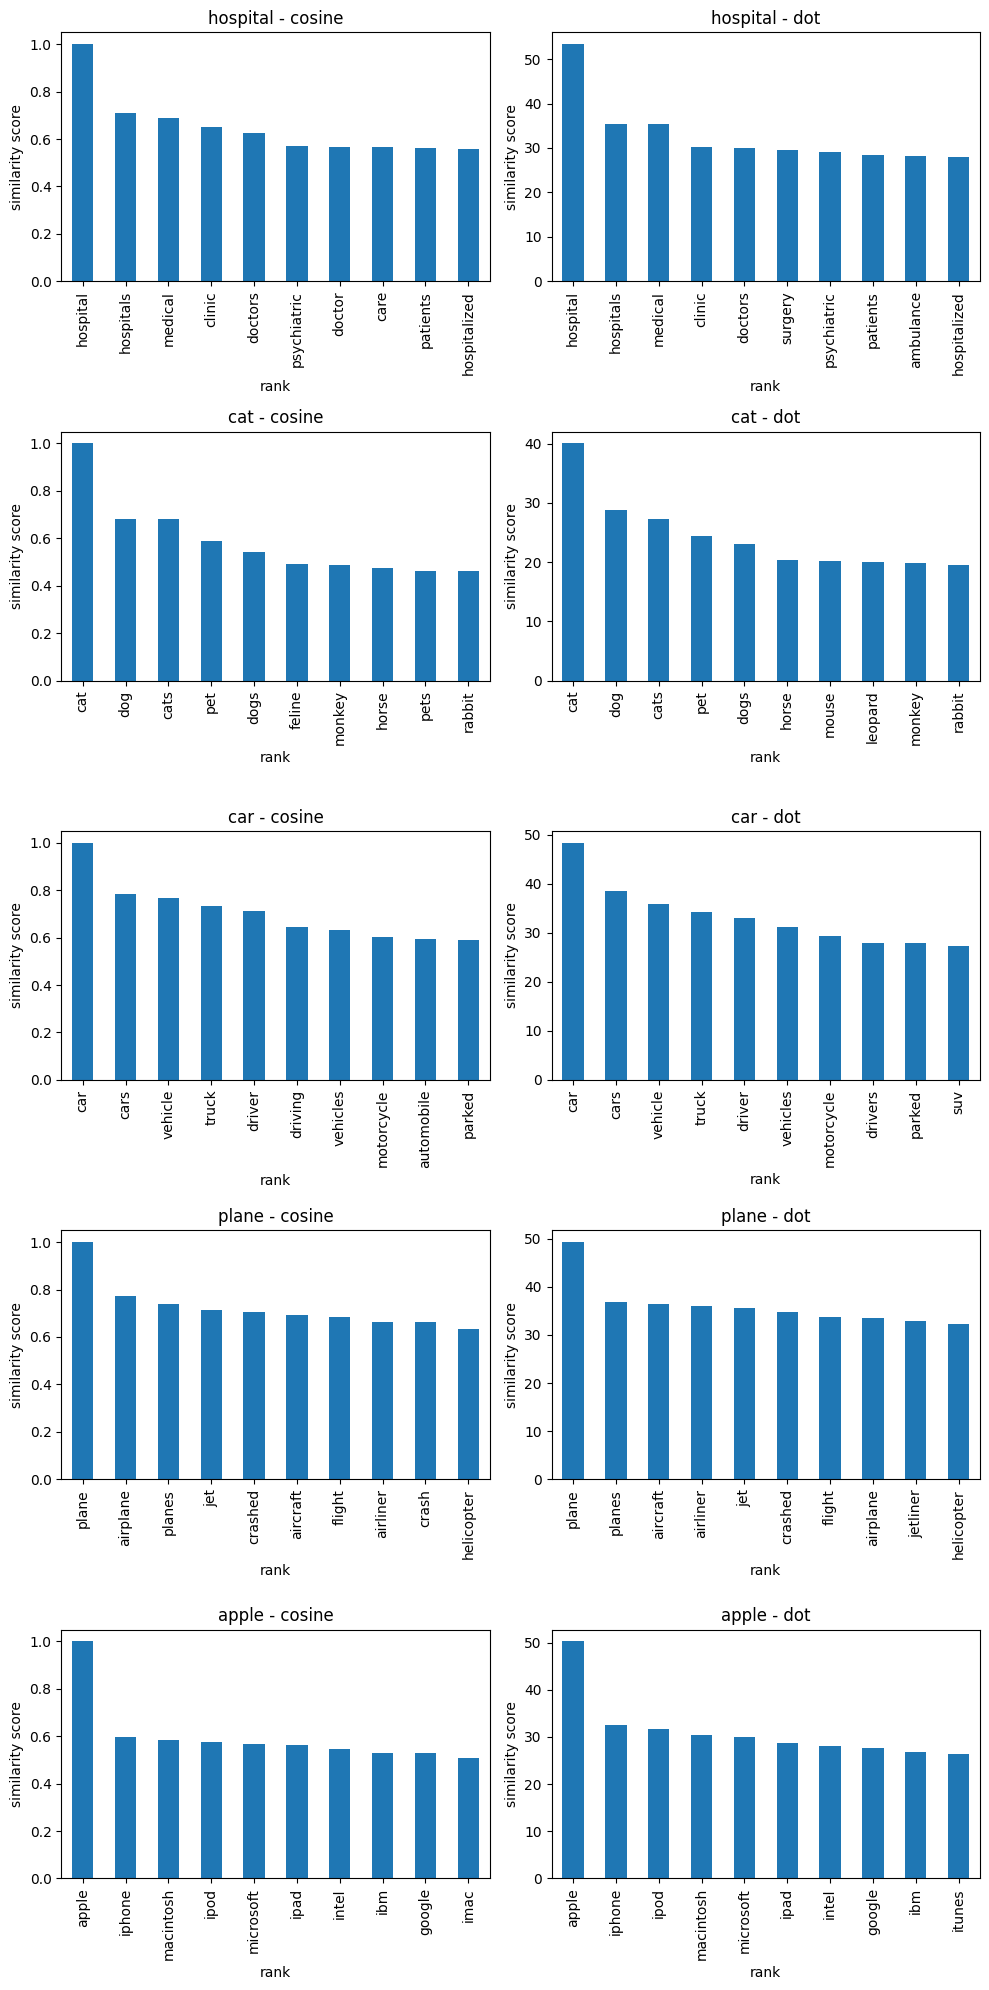

In [22]:
# plot the results
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
for i, source_word in enumerate(source_words):
    for j, metric in enumerate(['cosine', 'dot']):
        df.loc[source_word][metric]['score'].plot(kind='bar', ax=axes[i, j])
        axes[i, j].set_title(f'{source_word} - {metric}')
        axes[i, j].set_xlabel('rank')
        axes[i, j].set_ylabel('similarity score')
        axes[i, j].set_xticklabels(df.loc[source_word][metric]['word'])
plt.tight_layout()

The ranking for both similarity metrics is very similar, which makes sense, since the two metrics are very similar. The only difference is that the dot product similarity metric is slightly more sensitive to the magnitude of the vectors, which is why the scores are slightly different. Anyhow, the cosine similarity metric is more intuitive and interpretable, since it is between \[0, 1\].

<a name="section-taskB"></a><h2 style="color:rgb(0,120,170)">Task B: Document Classification with WE (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

This task follows the same instruction for document classification as provided in Assignment 1. You are indeed free to reuse any part of your code in Assignment 1 for this task. In Assignment 1, the representation of each document was created using a bag of words representation followed by dimensionality reduction. In this task, the document representations are created from the pre-trained word embeddings.

**Map word embeddings to dictionary words (5 points).** For every word in the dictionary (as discussed and created in Assignment 1), fetch the corresponding word embedding from the pre-trained model. If no embedding is found, initialize the corresponding word embedding randomly.

**Document embedding as the average of word embeddings (5 points).** Using the word embeddings, the representation of each document is defined as the *mean of the vectors of each document's words*. In particular, given the document $d$, consisting of words $\left[ v_1, v_2, ..., v_{|d|} \right]$, the document representation $\mathbf{e}_d$ is defined as:

$\mathbf{e}_d = \frac{1}{|d|}\sum_{i=1}^{|d|}{\mathbf{e}_{v_i}}$

where $\mathbf{e}_{v}$ is the vector of the word $v$, and $|d|$ is the length of the document.

**Classification and evaluation (5 points)** Using these new document representations, apply <ins>three classification algorithms</ins> and report the evaluation results (based on accuracy metric) on the test set.

</div>

## Pre-process

In [23]:
# print length of each set
print('Train set length: ', len(train_df))
print('Validation set length: ', len(val_df))
print('Test set length: ', len(test_df))

Train set length:  12110
Validation set length:  2596
Test set length:  2595


In [24]:
# print average length of text in each set
print('Average length of text in train set: ', np.round(np.mean(train_df['text'].str.len()), 2))
print('Average length of text in validation set: ', np.round(np.mean(val_df['text'].str.len()), 2))
print('Average length of text in test set: ', np.round(np.mean(test_df['text'].str.len()), 2))

Average length of text in train set:  450.86
Average length of text in validation set:  446.5
Average length of text in test set:  440.51


In [25]:
label_df

,label,caption
0,0,Agriculture
1,1,Cross
2,2,Education
3,3,Food
4,4,Health
5,5,Livelihood
6,6,Logistic
7,7,NFI
8,8,Nutrition
9,9,Protection


Each label corresponds to a given caption, i.e., a category.

In [26]:
def map_label_to_caption(label):
    """
    Map label id to caption using label_df
    :param label: label id, int
    :return: label caption, str
    """
    return label_df[label_df['label'] == label]['caption'].values[0]

In [27]:
train_df = train_df.assign(caption=train_df['label'].apply(map_label_to_caption))
val_df = val_df.assign(caption=val_df['label'].apply(map_label_to_caption))
test_df = test_df.assign(caption=test_df['label'].apply(map_label_to_caption))

### Clean text

In [28]:
import re

# remove punctuation marks, replace dates & numbers, apply case-sensitivity
# do this in order to reduce the size of the dictionary & reduce complexity
def clean_text(text):
    """
    Clean text by removing punctuation marks, replacing dates & numbers, applying case-sensitivity
    :param text: text to clean, str
    :return: cleaned text, str
    """
    # remove punctuation marks
#     text = re.sub(r'[^\w\s]', '', text)
    # replace dates
    text = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', '< date >', text)
    # replace numbers
    text = re.sub(r'\d+', '< num >', text)
    # apply case-sensitivity
    text = text.lower()
    return text

In [29]:
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
val_df['cleaned_text'] = val_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

In [30]:
train_df

,sentence_id,text,label,caption,cleaned_text
0,5446,In addition to the immediate life-saving inter...,9,Protection,in addition to the immediate life-saving inter...
1,8812,There are approximately 2.6 million people cla...,3,Food,there are approximately < num >.< num > millio...
2,16709,"While aid imports have held up recently, comme...",5,Livelihood,"while aid imports have held up recently, comme..."
3,3526,Heavy rainfalls as well as onrush of water fro...,0,Agriculture,heavy rainfalls as well as onrush of water fro...
4,4928,"Based on field reports 9 , the main production...",3,Food,"based on field reports < num > , the main prod..."
...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,Nutrition,the total gap in the number of people who requ...
12106,9655,A food crisis is looming in the country with t...,0,Agriculture,a food crisis is looming in the country with t...
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,Health,? acute watery diarrhoea (awd) continues to be...
12108,923,As South India grapples with drought and water...,11,WASH,as south india grapples with drought and water...


### Tokenization

In [31]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/tobias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tobias/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/tobias/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
# use NLTK tokenizer (TreebankWordTokenizer)
from nltk.tokenize import word_tokenize
train_df['tokenized_text'] = train_df['cleaned_text'].apply(word_tokenize)
val_df['tokenized_text'] = val_df['cleaned_text'].apply(word_tokenize)
test_df['tokenized_text'] = test_df['cleaned_text'].apply(word_tokenize)

## Stopwords

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tobias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# remove stopwords in English in order to reduce the size of the dictionary
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
train_df['tokenized_text'] = train_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
val_df['tokenized_text'] = val_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
test_df['tokenized_text'] = test_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [35]:
# create dictionary using train set
def create_dictionary(tokenized_text):
    """
    Create dictionary using train set
    :param tokenized_text: tokenized text, list
    :return: dictionary, dict
    """
    dictionary = {}
    for tokens in tokenized_text:
        for token in tokens:
            if token not in dictionary:
                dictionary[token] = 1
            else:
                dictionary[token] += 1
    return dictionary

In [36]:
dictionary = create_dictionary(train_df['tokenized_text'])

In [37]:
# print length of dictionary
print('Length of dictionary: ', len(dictionary))

Length of dictionary:  31363


In [38]:
# keep only top-N most frequent words
# removing any word with a lower frequency than a threshold
# OOV (out-of-vocabulary) words will be replaced with the <oov> token
def clean_dictionary(dictionary, N: int, threshold: int):
    """
    Clean dictionary by keeping only top-N most frequent words and removing any word with a lower frequency than a threshold
    :param dictionary: dictionary, dict
    :param N: top-N most frequent words, int
    :param threshold: threshold of word frequency, int
    :return: cleaned dictionary, dict
    """
    # keep only top-N most frequent words
    dictionary = dict(sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:N])

    # replace any word with a lower frequency than a threshold
    for key, value in dictionary.copy().items():
        if value < threshold:
            dictionary['<oov>'] = dictionary.get('<oov>', 0) + value
            dictionary.pop(key)
    return dictionary

In [39]:
dictionary = clean_dictionary(dictionary, N=100_000, threshold=5)

In [40]:
# print length of dictionary
print('Length of dictionary: ', len(dictionary))

Length of dictionary:  8247


**Map word embeddings to dictionary words (5 points).** For every word in the dictionary (as discussed and created in Assignment 1), fetch the corresponding word embedding from the pre-trained model. If no embedding is found, initialize the corresponding word embedding randomly.


In [41]:
# load the pre-trained word embeddings
print(glove_model)

KeyedVectors<vector_size=300, 400000 keys>


In [42]:
# create a dictionary of word embeddings
word_embeddings_train = {}
word_embeddings_val = {}
word_embeddings_test = {}
for split in [word_embeddings_train, word_embeddings_val, word_embeddings_test]:
    for word in dictionary:
        try:
            split[word] = glove_model[word]
        except KeyError:
            split[word] = np.random.uniform(-1, 1, size=300)

word_embeddings_train['<oov>'] = np.random.uniform(-1, 1, size=glove_model.vector_size)
word_embeddings_val['<oov>'] = np.random.uniform(-1, 1, size=glove_model.vector_size)
word_embeddings_test['<oov>'] = np.random.uniform(-1, 1, size=glove_model.vector_size)

In [43]:
# print length of word embeddings
print('Length of word embeddings: ', len(word_embeddings_train))

Length of word embeddings:  8247


In [44]:
train_df

,sentence_id,text,label,caption,cleaned_text,tokenized_text
0,5446,In addition to the immediate life-saving inter...,9,Protection,in addition to the immediate life-saving inter...,"[addition, immediate, life-saving, interventio..."
1,8812,There are approximately 2.6 million people cla...,3,Food,there are approximately < num >.< num > millio...,"[approximately, <, num, >, ., <, num, >, milli..."
2,16709,"While aid imports have held up recently, comme...",5,Livelihood,"while aid imports have held up recently, comme...","[aid, imports, held, recently, ,, commercial, ..."
3,3526,Heavy rainfalls as well as onrush of water fro...,0,Agriculture,heavy rainfalls as well as onrush of water fro...,"[heavy, rainfalls, well, onrush, water, upstre..."
4,4928,"Based on field reports 9 , the main production...",3,Food,"based on field reports < num > , the main prod...","[based, field, reports, <, num, >, ,, main, pr..."
...,...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,Nutrition,the total gap in the number of people who requ...,"[total, gap, number, people, require, assistan..."
12106,9655,A food crisis is looming in the country with t...,0,Agriculture,a food crisis is looming in the country with t...,"[food, crisis, looming, country, season, ’, ma..."
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,Health,? acute watery diarrhoea (awd) continues to be...,"[?, acute, watery, diarrhoea, (, awd, ), conti..."
12108,923,As South India grapples with drought and water...,11,WASH,as south india grapples with drought and water...,"[south, india, grapples, drought, water, short..."


**Document embedding as the average of word embeddings (5 points).** Using the word embeddings, the representation of each document is defined as the *mean of the vectors of each document's words*. In particular, given the document $d$, consisting of words $\left[ v_1, v_2, ..., v_{|d|} \right]$, the document representation $\mathbf{e}_d$ is defined as:

$\mathbf{e}_d = \frac{1}{|d|}\sum_{i=1}^{|d|}{\mathbf{e}_{v_i}}$

where $\mathbf{e}_{v}$ is the vector of the word $v$, and $|d|$ is the length of the document.

In [45]:
# drop words that are not in the dictionary
train_df['tokenized_text'] = train_df['tokenized_text'].apply(lambda x: [word for word in x if word in dictionary])
val_df['tokenized_text'] = val_df['tokenized_text'].apply(lambda x: [word for word in x if word in dictionary])
test_df['tokenized_text'] = test_df['tokenized_text'].apply(lambda x: [word for word in x if word in dictionary])

In [46]:
word_embeddings_train['addition'].shape

(300,)

In [47]:
# create a dictionary of document embeddings
document_embeddings_train = {}
for index, row in train_df.iterrows():
    # computes element-wise mean along the specified axis
    document_embeddings_train[row['sentence_id']] = np.mean([word_embeddings_train[word] for word in row['tokenized_text']], axis=0)

document_embeddings_val = {}
for index, row in val_df.iterrows():
    document_embeddings_val[row['sentence_id']] = np.mean([word_embeddings_val[word] for word in row['tokenized_text']], axis=0)

document_embeddings_test = {}
for index, row in test_df.iterrows():
    document_embeddings_test[row['sentence_id']] = np.mean([word_embeddings_test[word] for word in row['tokenized_text']], axis=0)

In [48]:
# move embeddings into df
train_df['document_embeddings'] = train_df['sentence_id'].map(document_embeddings_train)
val_df['document_embeddings'] = val_df['sentence_id'].map(document_embeddings_val)
test_df['document_embeddings'] = test_df['sentence_id'].map(document_embeddings_test)

In [49]:
train_df

,sentence_id,text,label,caption,cleaned_text,tokenized_text,document_embeddings
0,5446,In addition to the immediate life-saving inter...,9,Protection,in addition to the immediate life-saving inter...,"[addition, immediate, life-saving, interventio...","[-0.093476795, -0.000837736, 0.16196184, -0.02..."
1,8812,There are approximately 2.6 million people cla...,3,Food,there are approximately < num >.< num > millio...,"[approximately, <, num, >, ., <, num, >, milli...","[-0.18293726, 0.05829492, 0.08778859, -0.02920..."
2,16709,"While aid imports have held up recently, comme...",5,Livelihood,"while aid imports have held up recently, comme...","[aid, imports, held, recently, ,, commercial, ...","[0.11866271, 0.009274091, 0.05972651, -0.14722..."
3,3526,Heavy rainfalls as well as onrush of water fro...,0,Agriculture,heavy rainfalls as well as onrush of water fro...,"[heavy, rainfalls, well, water, upstream, hill...","[-0.13517979656558068, -0.05630535418889347, -..."
4,4928,"Based on field reports 9 , the main production...",3,Food,"based on field reports < num > , the main prod...","[based, field, reports, <, num, >, ,, main, pr...","[-0.1331483110326543, 0.07542296148016878, 0.1..."
...,...,...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,Nutrition,the total gap in the number of people who requ...,"[total, gap, number, people, require, assistan...","[-0.21061791, 0.05985846, 0.21382454, -0.02071..."
12106,9655,A food crisis is looming in the country with t...,0,Agriculture,a food crisis is looming in the country with t...,"[food, crisis, looming, country, season, ’, ma...","[-0.15977849, 0.045400452, 0.07647694, -0.0550..."
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,Health,? acute watery diarrhoea (awd) continues to be...,"[?, acute, watery, diarrhoea, (, awd, ), conti...","[0.0115707815, 0.055143524, 0.096252844, 0.012..."
12108,923,As South India grapples with drought and water...,11,WASH,as south india grapples with drought and water...,"[south, india, drought, water, shortage, ,, tu...","[-0.18711536, 0.029368445, -0.020083334, -0.13..."


In [50]:
val_df

,sentence_id,text,label,caption,cleaned_text,tokenized_text,document_embeddings
0,633,The veterans threw up roadblocks on the main n...,9,Protection,the veterans threw up roadblocks on the main n...,"[threw, main, highway, morning, ,, traffic, ,,...","[-0.18601175, -0.26252487, 0.054941665, 0.0021..."
1,6001,Water department complains about lack of skill...,11,WASH,water department complains about lack of skill...,"[water, department, lack, skilled, workers, aw...","[-0.019157480522280536, -0.08683458812165513, ..."
2,14014,"On 13 February 2018, the Ministry of Health of...",4,Health,"on < num > february < num >, the ministry of h...","[<, num, >, february, <, num, >, ,, ministry, ...","[-0.10311383540470498, 0.08527794677981314, 0...."
3,12225,"In Kakuma and Kalobeyei, both host and refugee...",7,NFI,"in kakuma and kalobeyei, both host and refugee...","[kakuma, kalobeyei, ,, host, refugee, communit...","[-0.06870294054060225, 0.026094279682702608, 0..."
4,10181,'Raqqa is now empty of civilians who had been ...,9,Protection,'raqqa is now empty of civilians who had been ...,"[empty, civilians, taken, human, shields, ,, '...","[-0.10982646, 0.090287864, 0.10718104, -0.0385..."
...,...,...,...,...,...,...,...
2591,5109,UNICEF-supported Child Health Days happen in D...,4,Health,unicef-supported child health days happen in d...,"[unicef-supported, child, health, days, happen...","[-0.17084297092151052, 0.1351369584650209, 0.1..."
2592,5696,The residents of Karachi once again faced prol...,7,NFI,the residents of karachi once again faced prol...,"[residents, karachi, faced, prolonged, power, ...","[-0.013541935, -0.020618187, 0.05550125, -0.15..."
2593,4622,Poverty ripping off Malawi farmers Poverty has...,3,Food,poverty ripping off malawi farmers poverty has...,"[poverty, malawi, farmers, poverty, left, farm...","[-0.15910497, 0.07687842, 0.084463544, 0.01881..."
2594,9053,The Sheikh Jarrah residential neighbourhood is...,10,Shelter,the sheikh jarrah residential neighbourhood is...,"[sheikh, jarrah, residential, neighbourhood, k...","[-0.10768389, -0.037770793, 0.021050956, -0.03..."


In [51]:
test_df

,sentence_id,text,label,caption,cleaned_text,tokenized_text,document_embeddings
0,5805,Overall 30% decrease in MAM Children admission...,8,Nutrition,overall < num >% decrease in mam children admi...,"[overall, <, num, >, %, decrease, mam, childre...","[-0.15477568, 0.1199117, 0.31659392, -0.040603..."
1,17120,"In 2014, fear of Ebola also led to attacks on ...",9,Protection,"in < num >, fear of ebola also led to attacks ...","[<, num, >, ,, fear, ebola, also, led, attacks...","[-0.13245693, 0.057286073, 0.06569567, -0.0252..."
2,11901,"Wheat is the staple food for most Afghans, com...",3,Food,"wheat is the staple food for most afghans, com...","[wheat, staple, food, afghans, ,, comprising, ...","[-0.076030225, -0.03276389, 0.073795095, -0.14..."
3,2589,We have received serious allegations that two ...,9,Protection,we have received serious allegations that two ...,"[received, serious, allegations, two, lna, fig...","[-0.03510326, 0.12675568, 0.19455142, 0.008961..."
4,4188,"Somali: 67 of 93 woredas hotspot . 410k MAM, 4...",8,Nutrition,somali: < num > of < num > woredas hotspot . <...,"[somali, :, <, num, >, <, num, >, woredas, hot...","[-0.17127988, 0.07232512, 0.25456542, 0.023812..."
...,...,...,...,...,...,...,...
2590,1979,Tropical Storm Dineo caused widespread damage ...,10,Shelter,tropical storm dineo caused widespread damage ...,"[tropical, storm, caused, widespread, damage, ...","[-0.08306688, 0.038516074, 0.058453973, -0.118..."
2591,7549,Monsoon rains and increased water levels in ma...,10,Shelter,monsoon rains and increased water levels in ma...,"[monsoon, rains, increased, water, levels, maj...","[-0.13587068, -0.018213073, 0.023086226, -0.06..."
2592,6064,I am extremely concerned about possible outbre...,11,WASH,i am extremely concerned about possible outbre...,"[extremely, concerned, possible, outbreaks, wa...","[0.025469813, -0.03305603, 0.10265118, -0.1074..."
2593,3582,Newly displaced persons from Al Mukha and Dhub...,11,WASH,newly displaced persons from al mukha and dhub...,"[newly, displaced, persons, al, areas, require...","[-0.0993140897621246, -0.08031745092514711, -0..."


In [52]:
# pickle files
train_df.to_pickle('train_df.pkl')
val_df.to_pickle('val_df.pkl')
test_df.to_pickle('test_df.pkl')

In [53]:
# load
train_df = pd.read_pickle('train_df.pkl')
val_df = pd.read_pickle('val_df.pkl')
test_df = pd.read_pickle('test_df.pkl')

**Classification and evaluation (5 points)** Using these new document representations, apply <ins>three classification algorithms</ins> and report the evaluation results (based on accuracy metric) on the test set.

In [54]:
X_train = np.array(train_df['document_embeddings'].tolist())
y_train = np.array(train_df['label'].tolist())
X_val = np.array(val_df['document_embeddings'].tolist())
y_val = np.array(val_df['label'].tolist())
X_test = np.array(test_df['document_embeddings'].tolist())
y_test = np.array(test_df['label'].tolist())

## Model 1

In [55]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(random_state=0, max_iter=1000)

In [56]:
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [57]:
from sklearn.metrics import accuracy_score, classification_report

In [58]:

y_pred = model_1.predict(X_val)
acc_score_val = accuracy_score(y_val, y_pred)
print('Accuracy on validation set: ', acc_score_val)

Accuracy on validation set:  0.7923728813559322


In [59]:
# classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.21      0.31        53
           1       0.47      0.24      0.32       122
           2       0.91      0.82      0.86       140
           3       0.78      0.89      0.83       420
           4       0.90      0.90      0.90       665
           5       0.62      0.50      0.55       113
           6       0.47      0.32      0.38        28
           7       0.77      0.63      0.70        38
           8       0.85      0.76      0.80       102
           9       0.77      0.88      0.82       546
          10       0.68      0.72      0.70       195
          11       0.79      0.84      0.81       174

    accuracy                           0.79      2596
   macro avg       0.72      0.64      0.67      2596
weighted avg       0.78      0.79      0.78      2596



/home/tobias/miniconda3/envs/nlp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


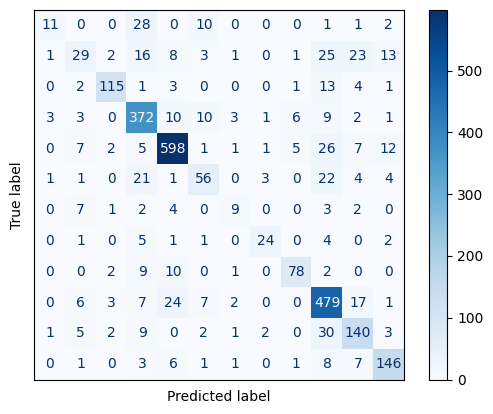

In [60]:
# confusion matrix display
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(model_1, X_val, y_val, cmap=plt.cm.Blues)
# remove ticks
plt.xticks([])
plt.yticks([])
plt.show()

## Model 2

In [61]:
from sklearn.neural_network import MLPClassifier

model_2 = MLPClassifier(random_state=1, max_iter=300)

In [62]:
model_2.fit(X_train, y_train)

/home/tobias/miniconda3/envs/nlp/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(max_iter=300, random_state=1)

In [63]:
y_pred = model_2.predict(X_val)
acc_score_val = accuracy_score(y_val, y_pred)
print('Accuracy on validation set: ', acc_score_val)

Accuracy on validation set:  0.7630970724191063


In [64]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.21      0.25        53
           1       0.31      0.31      0.31       122
           2       0.84      0.81      0.82       140
           3       0.79      0.82      0.80       420
           4       0.91      0.87      0.89       665
           5       0.55      0.54      0.55       113
           6       0.50      0.46      0.48        28
           7       0.57      0.66      0.61        38
           8       0.76      0.75      0.76       102
           9       0.80      0.82      0.81       546
          10       0.68      0.69      0.69       195
          11       0.72      0.79      0.76       174

    accuracy                           0.76      2596
   macro avg       0.65      0.64      0.64      2596
weighted avg       0.76      0.76      0.76      2596



/home/tobias/miniconda3/envs/nlp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


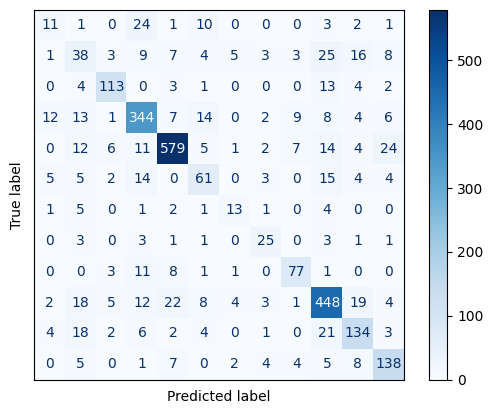

In [65]:
plot_confusion_matrix(model_2, X_val, y_val, cmap=plt.cm.Blues)
# remove ticks
plt.xticks([])
plt.yticks([])
plt.show()

## Model 3

In [66]:
from sklearn.svm import LinearSVC

In [67]:
model_3 = LinearSVC(random_state=0, tol=1e-5, max_iter=1000)

In [68]:
model_3.fit(X_train, y_train)

LinearSVC(random_state=0, tol=1e-05)

In [69]:
y_pred = model_3.predict(X_val)
acc_score_val = accuracy_score(y_val, y_pred)
print('Accuracy on validation set: ', acc_score_val)

Accuracy on validation set:  0.7916024653312789


In [70]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25        53
           1       0.62      0.15      0.24       122
           2       0.85      0.84      0.84       140
           3       0.77      0.88      0.82       420
           4       0.88      0.90      0.89       665
           5       0.67      0.54      0.60       113
           6       0.50      0.21      0.30        28
           7       0.67      0.68      0.68        38
           8       0.84      0.77      0.81       102
           9       0.78      0.88      0.83       546
          10       0.69      0.73      0.71       195
          11       0.77      0.86      0.82       174

    accuracy                           0.79      2596
   macro avg       0.71      0.63      0.65      2596
weighted avg       0.78      0.79      0.77      2596



/home/tobias/miniconda3/envs/nlp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


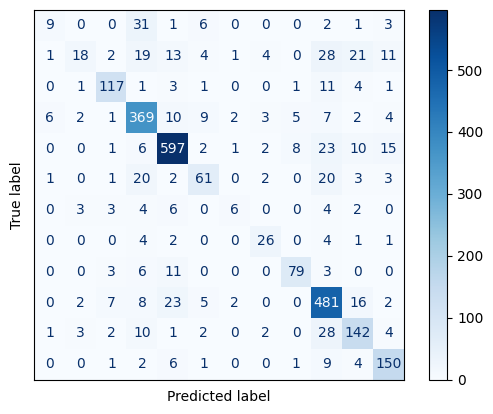

In [71]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(model_3, X_val, y_val, cmap=plt.cm.Blues)
# remove ticks
plt.xticks([])
plt.yticks([])
plt.show()

## Compare models on test set

In [72]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

In [73]:
print('Accuracy on test set for model 1 (Logistic Regression): ', accuracy_score(y_test, y_pred_1))
print('Accuracy on test set for model 2 (MLP): ', accuracy_score(y_test, y_pred_2))
print('Accuracy on test set for model 3 (Linear SVC): ', accuracy_score(y_test, y_pred_3))

Accuracy on test set for model 1 (Logistic Regression):  0.7865125240847785
Accuracy on test set for model 2 (MLP):  0.7714836223506744
Accuracy on test set for model 3 (Linear SVC):  0.7903660886319845


We can see that the models perform rather similarly on the test set. Model 3 (the Linear SVC) is the best performing model, with model 1 (Logistic Regression) being the close second. Model 2 (MLP) is the worst performing model, but still performs decently.

<a name="section-taskC"></a><h2 style="color:rgb(0,120,170)">Task C: Classification with sent2vec Document Embeddings (2 extra point)</h2>

<div style="background-color:rgb(224, 243, 255)">

Sent2vec [1] suggests another unsupervised approach to creating document embeddings from the underlying word embeddings. First, using the provided code in the paper, train a sendtvec model on the training set to create document embeddings. Then, repeat Task B while using the document embeddings provided by sent2vec. Similar to Task 2, conduct the classification experiments and report evaluation results.

[1] M. Pagliardini, P. Gupta, and M. Jaggi. Unsupervised Learning of Sentence Embeddings using Compositional n-Gram Features. In Proceedings of the conference of the North American Chapter of the Association for Computational Linguistics (NAACL), 2018.

</div>

In [74]:
import sent2vec

In [75]:
model = sent2vec.Sent2vecModel()

In [76]:
train_df['tokenized_text'][0]

['addition',
 'immediate',
 'life-saving',
 'interventions',
 ',',
 'unicef',
 'taking',
 'action',
 'protect',
 '<',
 'num',
 '>',
 'children',
 'arrived',
 'camps',
 'angola',
 'without',
 'families',
 '.']

In [77]:
len(train_df)

12110

In [78]:
tokenized_text = [' '.join(text) for text in train_df['tokenized_text']]

In [79]:
len(train_df['document_embeddings'][0])

300

In [80]:
path = "data/nlp2022_23_data/tokenized_text_train.txt"

with open(path, "w") as f: 
    f.write('\n'.join(tokenized_text))

In [81]:
# -minCount 5 -dim 500 -epoch 15 -lr 0.002 -wordNgrams 2 -loss ns -neg 10 -thread 20 -t 0.000005 -dropoutK 4 -minCountLabel 20 -bucket 4000000 -maxVocabSize 100000
# !./fastText/sent2vec/fasttext sent2vec -input "data/nlp2022_23_data/thedeep.subset.train.txt" -output "data/sent2vec_model" -epoch 100 -lr 0.2
!./fastText/sent2vec/fasttext sent2vec -input "data/nlp2022_23_data/tokenized_text_train.txt" -output "data/sent2vec_model" -epoch 80 -lr 0.2 -dim 300

Read 0M words
Number of words:  8248
Number of labels: 0
Progress: 100.0%  words/sec/thread: 33469  lr: 0.000000  loss: 1.216082  eta: 0h0m 3%  words/sec/thread: 8312  lr: 0.199329  loss: 3.447351  eta: 0h10m %  words/sec/thread: 12904  lr: 0.198708  loss: 3.355298  eta: 0h6m 15781  lr: 0.198180  loss: 3.286321  eta: 0h5m 1.8%  words/sec/thread: 21323  lr: 0.196494  loss: 3.144885  eta: 0h3m 2.8%  words/sec/thread: 24497  lr: 0.194485  loss: 3.071615  eta: 0h3m 2.8%  words/sec/thread: 24644  lr: 0.194363  loss: 3.060372  eta: 0h3m 0.193444  loss: 2.987117  eta: 0h3m 3.5%  words/sec/thread: 25918  lr: 0.193030  loss: 2.968529  eta: 0h3m 3.5%  words/sec/thread: 25972  lr: 0.192927  loss: 2.960618  eta: 0h3m 3.7%  words/sec/thread: 26160  lr: 0.192592  loss: 2.936293  eta: 0h3m 3.8%  words/sec/thread: 26248  lr: 0.192498  loss: 2.927403  eta: 0h3m 3.9%  words/sec/thread: 26399  lr: 0.192242  loss: 2.911876  eta: 0h3m 4.0%  words/sec/thread: 26625  lr: 0.191918  loss: 2.893765  eta: 0h3m 4

In [82]:
model.load_model('data/sent2vec_model.bin')

In [83]:
uni_embs, vocab = model.get_unigram_embeddings()

In [84]:
uni_embs.shape

(8248, 300)

In [85]:
vocab[:10]

['<PLACEHOLDER>', ',', '<', '>', 'num', '.', '</s>', ')', '(', 'cases']

In [86]:
train_df['tokenized_text'][0]

['addition',
 'immediate',
 'life-saving',
 'interventions',
 ',',
 'unicef',
 'taking',
 'action',
 'protect',
 '<',
 'num',
 '>',
 'children',
 'arrived',
 'camps',
 'angola',
 'without',
 'families',
 '.']

In [87]:
sentence_embeddings_train = {}
for index, row in train_df.iterrows():
    # computes element-wise mean along the specified axis
    sentence_embeddings_train[row['sentence_id']] = np.mean(model.embed_unigrams(row['tokenized_text']), axis=0)

In [88]:
# move embeddings into df
train_df['sentence_embeddings'] = train_df['sentence_id'].map(sentence_embeddings_train)

In [89]:
train_df

,sentence_id,text,label,caption,cleaned_text,tokenized_text,document_embeddings,sentence_embeddings
0,5446,In addition to the immediate life-saving inter...,9,Protection,in addition to the immediate life-saving inter...,"[addition, immediate, life-saving, interventio...","[-0.093476795, -0.000837736, 0.16196184, -0.02...","[-0.3199597, 0.002913275, -0.2206722, 0.225501..."
1,8812,There are approximately 2.6 million people cla...,3,Food,there are approximately < num >.< num > millio...,"[approximately, <, num, >, ., <, num, >, milli...","[-0.18293726, 0.05829492, 0.08778859, -0.02920...","[-0.20553748, 0.22014655, -0.04603493, 0.19179..."
2,16709,"While aid imports have held up recently, comme...",5,Livelihood,"while aid imports have held up recently, comme...","[aid, imports, held, recently, ,, commercial, ...","[0.11866271, 0.009274091, 0.05972651, -0.14722...","[-0.092249215, 0.4029353, -0.057907265, -0.063..."
3,3526,Heavy rainfalls as well as onrush of water fro...,0,Agriculture,heavy rainfalls as well as onrush of water fro...,"[heavy, rainfalls, well, water, upstream, hill...","[-0.13517979656558068, -0.05630535418889347, -...","[0.034044154, 0.36403084, -0.26526612, -0.0993..."
4,4928,"Based on field reports 9 , the main production...",3,Food,"based on field reports < num > , the main prod...","[based, field, reports, <, num, >, ,, main, pr...","[-0.1331483110326543, 0.07542296148016878, 0.1...","[0.26944327, 0.1733922, 0.09724752, -0.0492026..."
...,...,...,...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,Nutrition,the total gap in the number of people who requ...,"[total, gap, number, people, require, assistan...","[-0.21061791, 0.05985846, 0.21382454, -0.02071...","[0.23793975, 0.17761831, -0.042763416, 0.00133..."
12106,9655,A food crisis is looming in the country with t...,0,Agriculture,a food crisis is looming in the country with t...,"[food, crisis, looming, country, season, ’, ma...","[-0.15977849, 0.045400452, 0.07647694, -0.0550...","[-0.026937416, 0.0612251, 0.085071065, -0.1084..."
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,Health,? acute watery diarrhoea (awd) continues to be...,"[?, acute, watery, diarrhoea, (, awd, ), conti...","[0.0115707815, 0.055143524, 0.096252844, 0.012...","[-0.36921743, -0.129345, -0.28724694, 0.064349..."
12108,923,As South India grapples with drought and water...,11,WASH,as south india grapples with drought and water...,"[south, india, drought, water, shortage, ,, tu...","[-0.18711536, 0.029368445, -0.020083334, -0.13...","[-0.18966265, 0.05037727, 0.099159844, -0.2288..."


In [90]:
sentence_embeddings_val = {}
for index, row in val_df.iterrows():
    # computes element-wise mean along the specified axis
    sentence_embeddings_val[row['sentence_id']] = np.mean(model.embed_unigrams(row['tokenized_text']), axis=0)
    
val_df['sentence_embeddings'] = val_df['sentence_id'].map(sentence_embeddings_val)

In [91]:
sentence_embeddings_test = {}
for index, row in test_df.iterrows():
    # computes element-wise mean along the specified axis
    sentence_embeddings_test[row['sentence_id']] = np.mean(model.embed_unigrams(row['tokenized_text']), axis=0)
    
test_df['sentence_embeddings'] = test_df['sentence_id'].map(sentence_embeddings_test)

### Classify with sentence embeddings

In [92]:
X_train = np.array(train_df['sentence_embeddings'].tolist())
y_train = np.array(train_df['label'].tolist())
X_val = np.array(val_df['sentence_embeddings'].tolist())
y_val = np.array(val_df['label'].tolist())
X_test = np.array(test_df['sentence_embeddings'].tolist())
y_test = np.array(test_df['label'].tolist())

## Model 1

In [93]:
model_1 = LogisticRegression(random_state=0, max_iter=1000)

In [94]:
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [95]:
y_pred = model_1.predict(X_val)
acc_score_val = accuracy_score(y_val, y_pred)
print('Accuracy on validation set: ', acc_score_val)

Accuracy on validation set:  0.7804314329738059


In [96]:
# classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.26      0.34        53
           1       0.37      0.23      0.28       122
           2       0.93      0.80      0.86       140
           3       0.79      0.85      0.82       420
           4       0.89      0.90      0.89       665
           5       0.63      0.51      0.57       113
           6       0.30      0.25      0.27        28
           7       0.61      0.66      0.63        38
           8       0.85      0.76      0.80       102
           9       0.78      0.86      0.82       546
          10       0.66      0.70      0.68       195
          11       0.79      0.81      0.80       174

    accuracy                           0.78      2596
   macro avg       0.67      0.63      0.65      2596
weighted avg       0.77      0.78      0.77      2596



/home/tobias/miniconda3/envs/nlp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


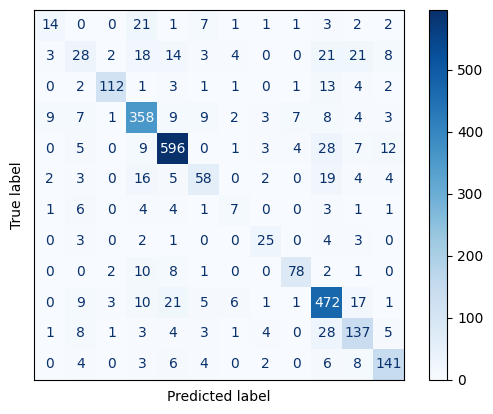

In [97]:
plot_confusion_matrix(model_1, X_val, y_val, cmap=plt.cm.Blues)
# remove ticks
plt.xticks([])
plt.yticks([])
plt.show()

## Model 2

In [98]:
from sklearn.neural_network import MLPClassifier

model_2 = MLPClassifier(random_state=1, max_iter=300)

In [99]:
model_2.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [100]:
y_pred = model_2.predict(X_val)
acc_score_val = accuracy_score(y_val, y_pred)
print('Accuracy on validation set: ', acc_score_val)

Accuracy on validation set:  0.7515408320493067


In [101]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.30      0.38        53
           1       0.29      0.27      0.28       122
           2       0.85      0.79      0.82       140
           3       0.77      0.85      0.81       420
           4       0.88      0.86      0.87       665
           5       0.54      0.51      0.52       113
           6       0.21      0.21      0.21        28
           7       0.48      0.66      0.56        38
           8       0.81      0.77      0.79       102
           9       0.78      0.80      0.79       546
          10       0.65      0.63      0.64       195
          11       0.74      0.77      0.76       174

    accuracy                           0.75      2596
   macro avg       0.63      0.62      0.62      2596
weighted avg       0.75      0.75      0.75      2596



/home/tobias/miniconda3/envs/nlp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


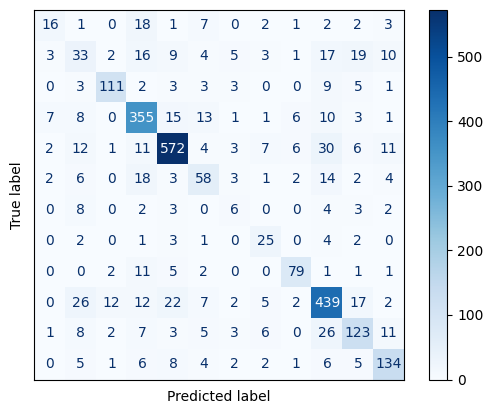

In [102]:
plot_confusion_matrix(model_2, X_val, y_val, cmap=plt.cm.Blues)
# remove ticks
plt.xticks([])
plt.yticks([])
plt.show()

## Model 3

In [103]:
from sklearn.svm import LinearSVC

In [104]:
model_3 = LinearSVC(random_state=0, tol=1e-5, max_iter=1000)

In [105]:
model_3.fit(X_train, y_train)

/home/tobias/miniconda3/envs/nlp/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=0, tol=1e-05)

In [106]:
y_pred = model_3.predict(X_val)
acc_score_val = accuracy_score(y_val, y_pred)
print('Accuracy on validation set: ', acc_score_val)

Accuracy on validation set:  0.7865947611710323


In [107]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.19      0.27        53
           1       0.48      0.12      0.20       122
           2       0.90      0.84      0.87       140
           3       0.79      0.89      0.84       420
           4       0.88      0.91      0.89       665
           5       0.65      0.50      0.57       113
           6       0.31      0.18      0.23        28
           7       0.67      0.68      0.68        38
           8       0.85      0.78      0.82       102
           9       0.76      0.88      0.81       546
          10       0.65      0.66      0.65       195
          11       0.77      0.84      0.81       174

    accuracy                           0.79      2596
   macro avg       0.68      0.62      0.64      2596
weighted avg       0.77      0.79      0.77      2596



/home/tobias/miniconda3/envs/nlp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


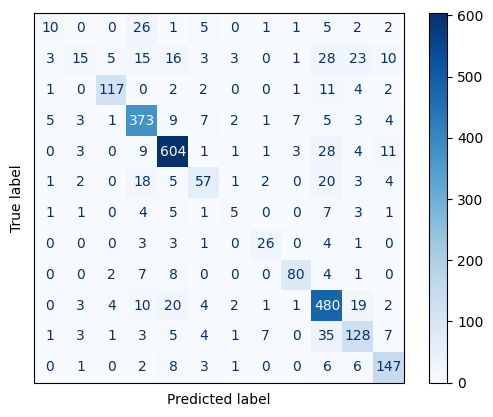

In [108]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(model_3, X_val, y_val, cmap=plt.cm.Blues)
# remove ticks
plt.xticks([])
plt.yticks([])
plt.show()

## Compare models on test set

In [109]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

In [110]:
print('Accuracy on test set for model 1 (Logistic Regression): ', accuracy_score(y_test, y_pred_1))
print('Accuracy on test set for model 2 (MLP): ', accuracy_score(y_test, y_pred_2))
print('Accuracy on test set for model 3 (Linear SVC): ', accuracy_score(y_test, y_pred_3))

Accuracy on test set for model 1 (Logistic Regression):  0.7764932562620424
Accuracy on test set for model 2 (MLP):  0.7595375722543353
Accuracy on test set for model 3 (Linear SVC):  0.7791907514450868
